In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


df = pd.read_csv('diamonds 2.csv')
display(df.head())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [267]:
cols = df.columns.tolist()
cols.remove('price')
cols.append('price')
df = df[cols]
display(df.head())



,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   x           53947 non-null  float64
 8   y           53947 non-null  float64
 9   z           53947 non-null  object 
 10  price       53947 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [269]:
#cause the z object so it should be some non numeric records which we should handle
df['z'] = pd.to_numeric(df['z'], errors='coerce')
df.dropna(inplace=True)
display(df.head())

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53941 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53941 non-null  int64  
 1   carat       53941 non-null  float64
 2   cut         53941 non-null  object 
 3   color       53941 non-null  object 
 4   clarity     53941 non-null  object 
 5   depth       53941 non-null  float64
 6   table       53941 non-null  float64
 7   x           53941 non-null  float64
 8   y           53941 non-null  float64
 9   z           53941 non-null  float64
 10  price       53941 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [271]:
df.drop(columns="Unnamed: 0", inplace=True)

In [272]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0
price,0


In [273]:
df.dropna(inplace=True)
display(df.head())

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [274]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0
price,0


In [247]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 153


In [248]:
df.drop_duplicates(inplace=True)
display(df.head())

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [275]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 153


# **drop any negative or Zero values in price**

In [289]:
negative_or_zero_price = df[df['price'] <= 0]
if negative_or_zero_price.empty:
    print("There are no negative or zero values in the 'price' column.")
else:
    print(f"Dropping {len(negative_or_zero_price)} rows with negative or zero values in the 'price' column.")
    df = df[df['price'] > 0]
    display(df.head())

There are no negative or zero values in the 'price' column.


# **HeatMap to find the correlation between the features**

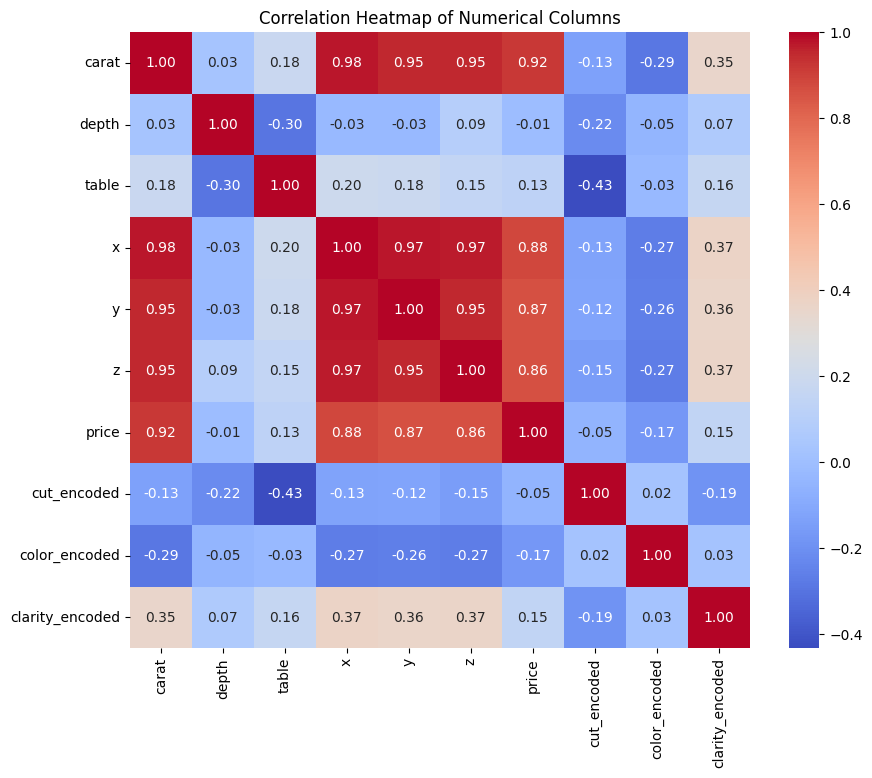

In [287]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# **1D Visual of numerical data**

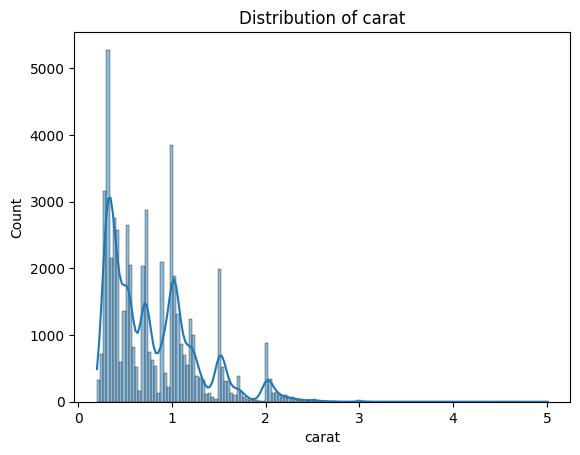

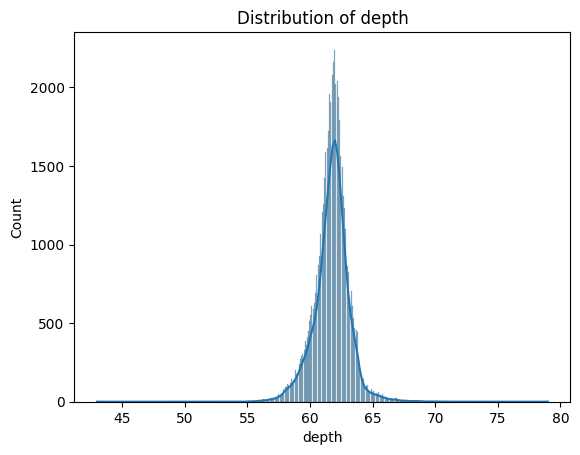

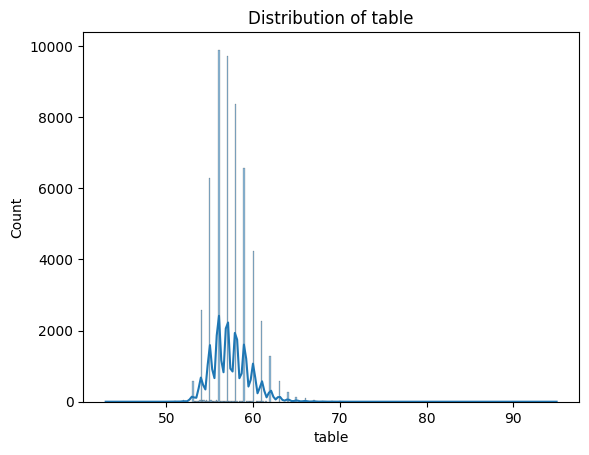

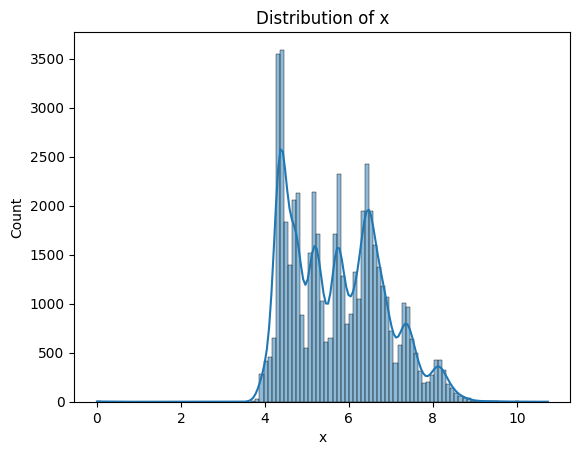

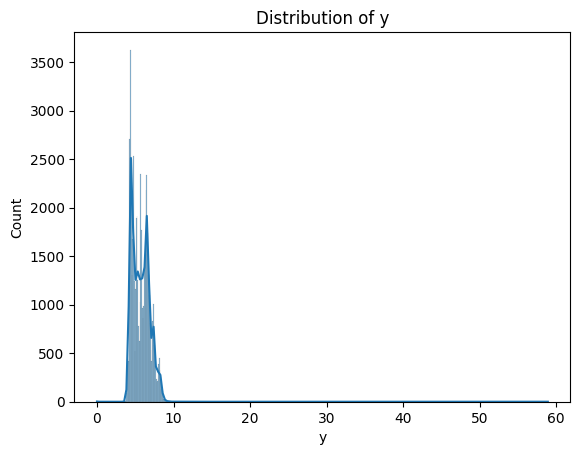

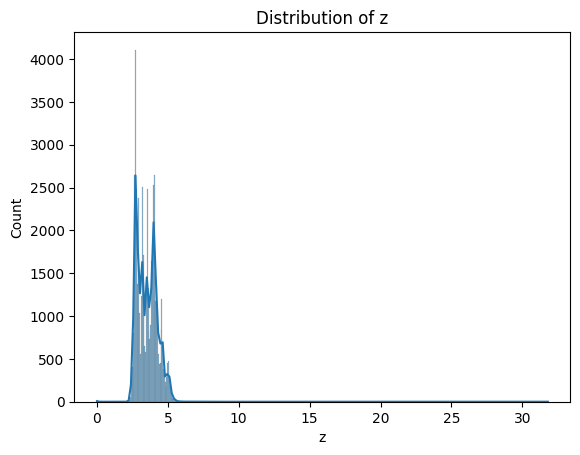

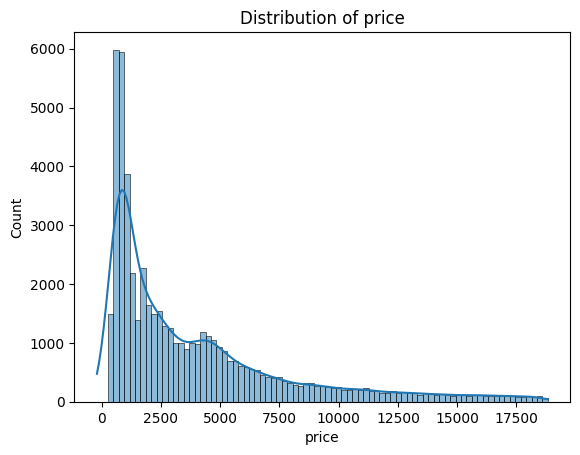

In [276]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


#insights
#Carat and Price are skewed to the right, meaning there are more diamonds with lower carats and prices, and fewer with very high values.
#Depth and Table centered around their averages.



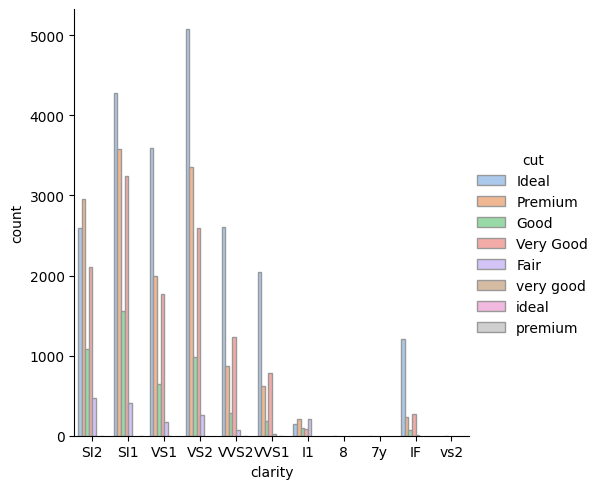

In [277]:
sns.catplot(x="clarity", hue="cut", kind="count", palette="pastel", edgecolor=".6", data=df)
# found inconsitant values

# **2D Visual**

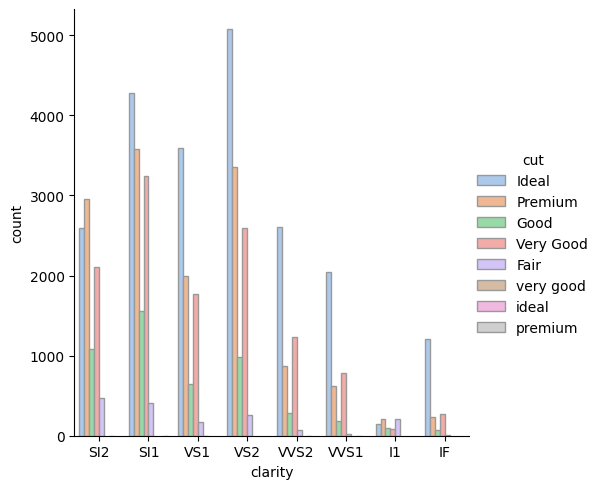

In [280]:
clarity_to_remove = ['8', '7y', 'vs2']
df_filtered_clarity = df[~df['clarity'].isin(clarity_to_remove)]
sns.catplot(x="clarity", hue="cut", kind="count", palette="pastel", edgecolor=".6", data=df_filtered_clarity)
plt.show()


#insigths
#this catplot describes the distribution of  diamonds cuts across multiple clarity levels
#VS2 clarity level shows a the highest ideal cuts variations among all clarity levels


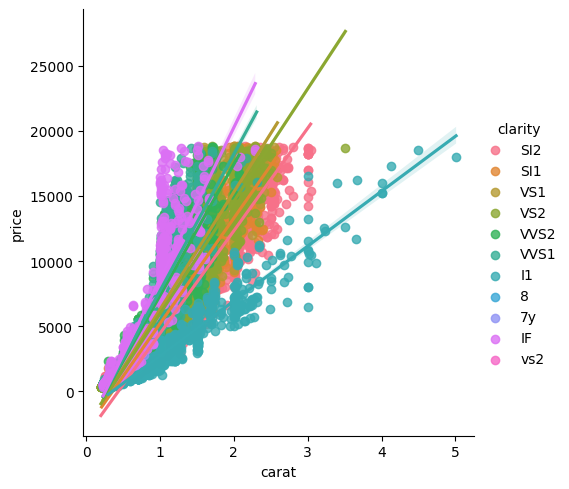

In [290]:
sns.lmplot(x="carat", y="price", hue="clarity", data=df)
# this shows How spread or variance differs across clarity levels.
# How spread or variance differs across clarity levels.

<Axes: xlabel='carat', ylabel='price'>

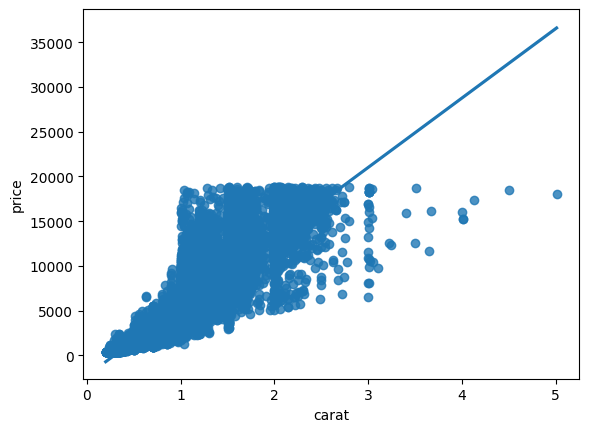

In [292]:
sns.regplot(x="carat", y="price", data=df)
# visualizing how diamond carat affects price .
# as the carat increases the price also increases

# **1D visual of categorical data**

<Axes: xlabel='cut', ylabel='count'>

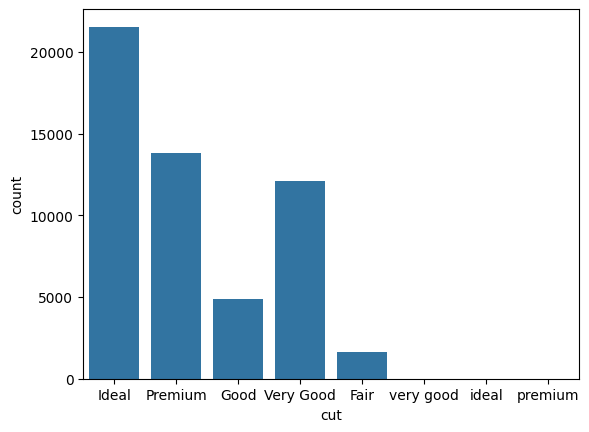

In [278]:
sns.countplot(x="cut", data=df)
# found inconsitant values

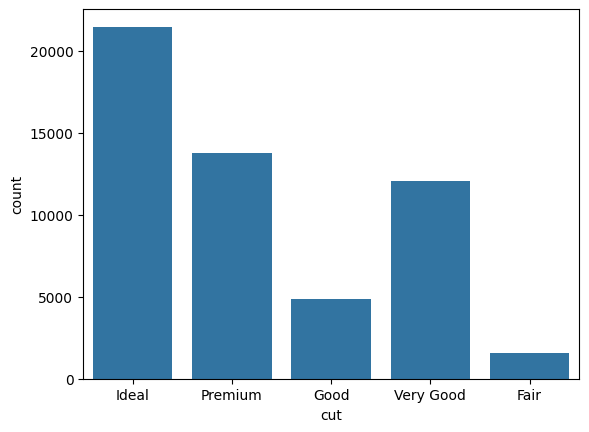

In [253]:
df['cut'] = df['cut'].replace({'very good': 'Very Good', 'ideal': 'Ideal' , 'premium' : 'Premium'})
sns.countplot(x="cut", data=df)
plt.show()

<Axes: xlabel='color', ylabel='count'>

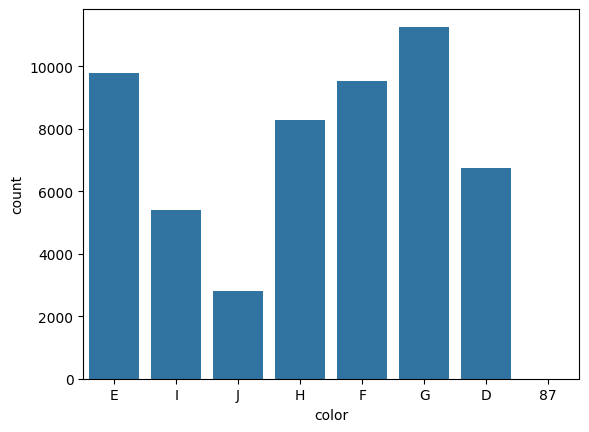

In [254]:
sns.countplot(x="color", data=df)
# found inconsitant values

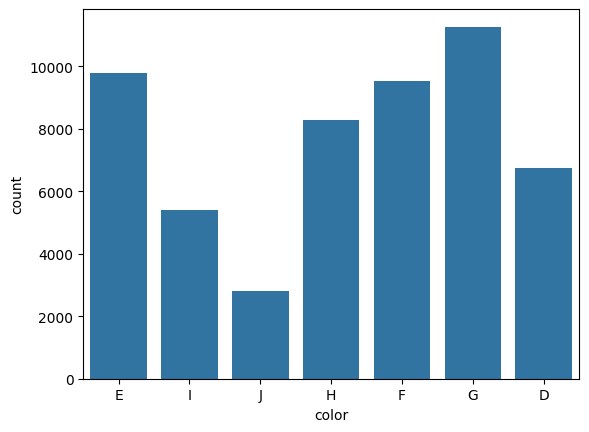

In [255]:
df_filtered_color = df[df['color'] != '87']
sns.countplot(x="color", data=df_filtered_color)
plt.show()
#their were inconsistant datatypes

<Axes: xlabel='clarity', ylabel='count'>

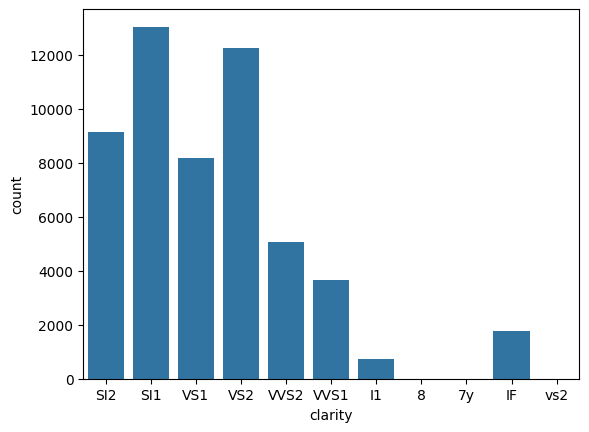

In [256]:
sns.countplot(x="clarity", data=df)


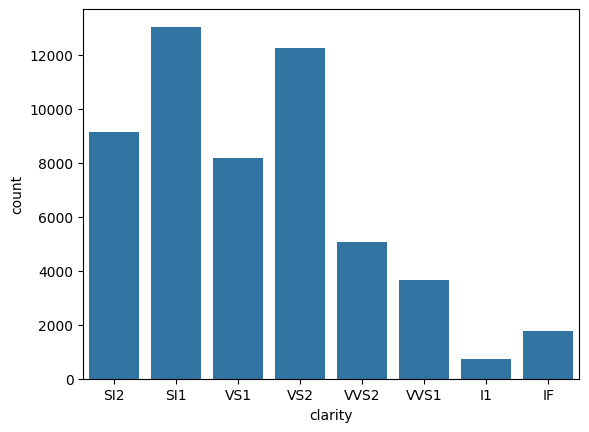

In [257]:
clarity_to_remove = ['8', '7y', 'vs2']
df_filtered_clarity = df[~df['clarity'].isin(clarity_to_remove)]
sns.countplot(x="clarity", data=df_filtered_clarity)
plt.show()

# **3D Visual**

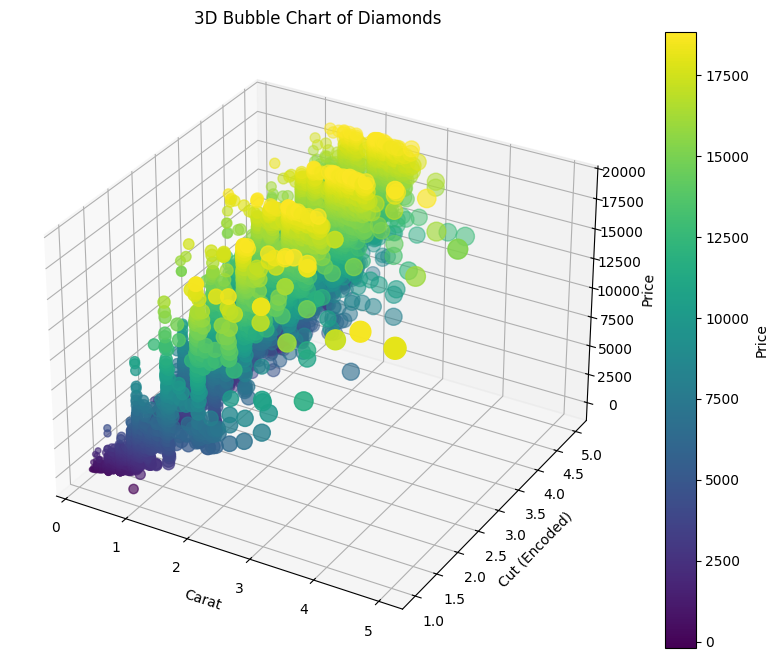

In [285]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(df['carat'], df['cut_encoded'], df['price'], s=df['carat']*50, c=df['price'], cmap='viridis')

ax.set_xlabel('Carat')
ax.set_ylabel('Cut (Encoded)')
ax.set_zlabel('Price')
ax.set_title('3D Bubble Chart of Diamonds')


fig.colorbar(scatter, label='Price')

plt.show()

#insights
# Carat and Price : As the carat size increases (along the x-axis), the price generally increases (along the z-axis)
# Cut and Price: The plot shows that diamonds with better cuts (higher encoded values along the y-axis) tend to have higher prices.This suggests that cut quality significantly impacts the price.
#the visualization demonstrates that carat size, cut quality, and price are all positively correlated, and the combined effect of carat and cut plays a significant role in determining the price of a diamond


# **checking for outliers amoung the numerical columns**

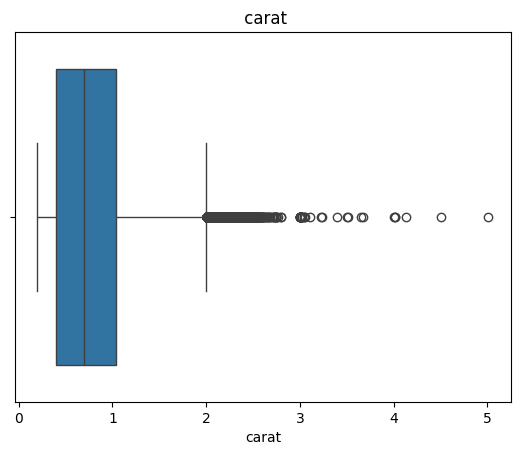

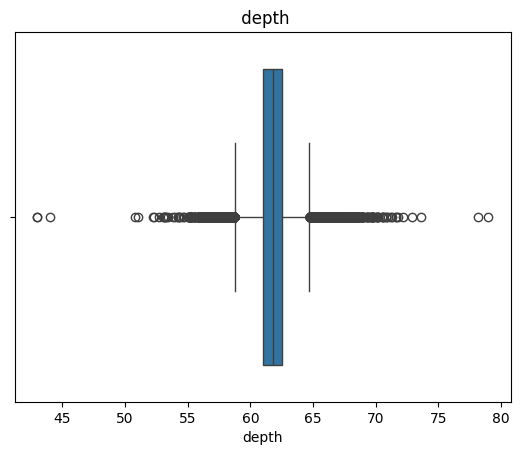

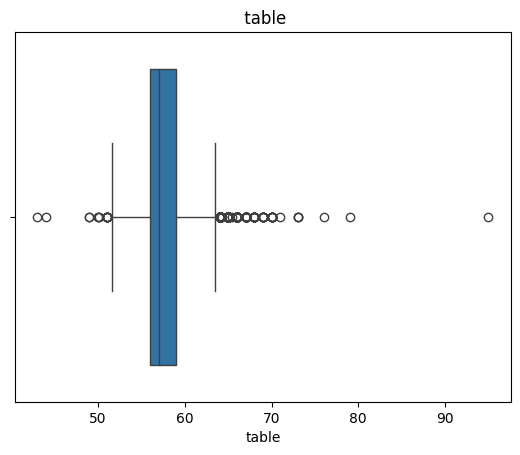

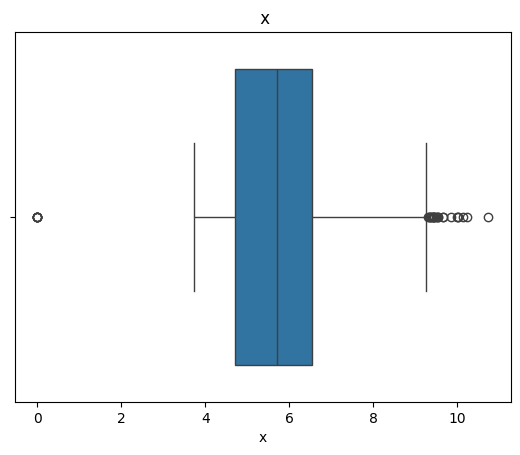

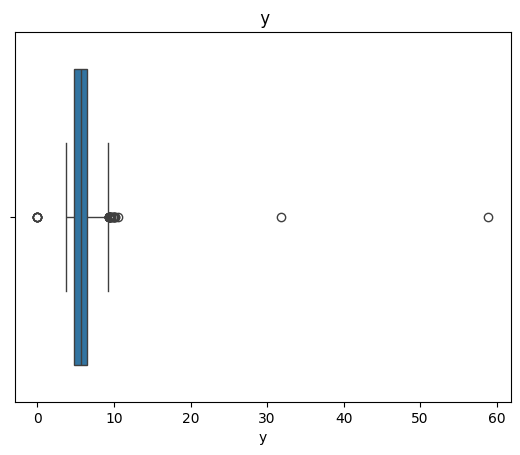

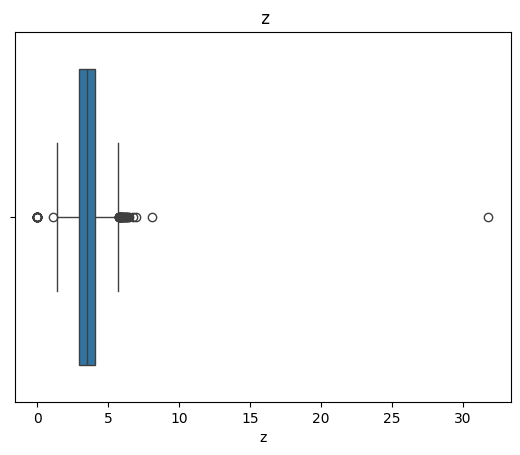

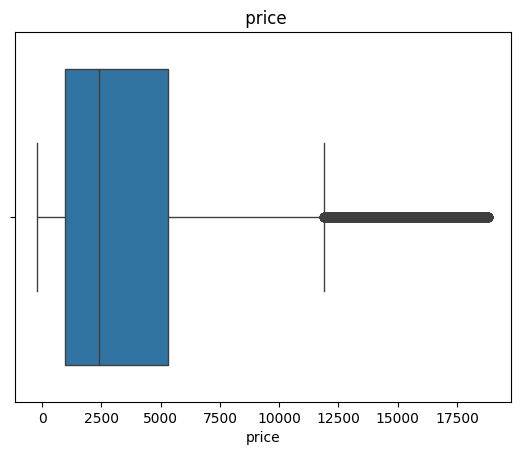

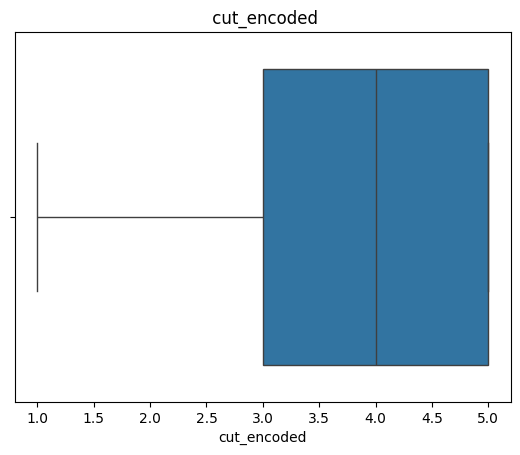

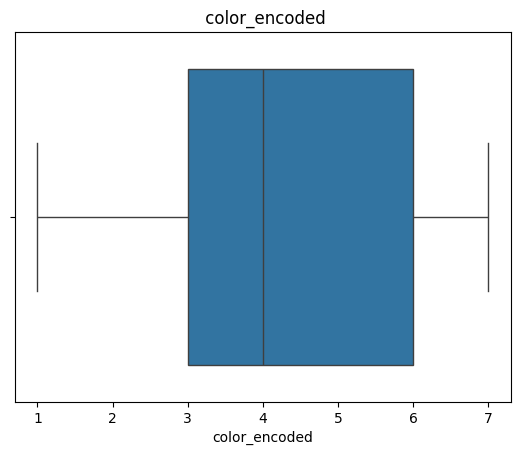

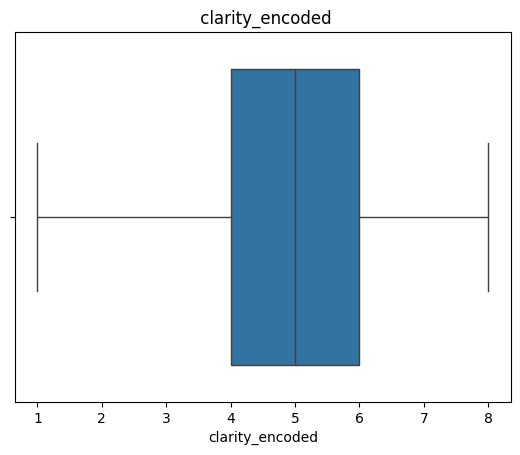

In [262]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f' {col}')
    plt.show()

# **custom encoding to the categorical data**

In [281]:
cut_mapping = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
df['cut_encoded'] = df['cut'].map(cut_mapping)

color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
df['color_encoded'] = df['color'].map(color_mapping)

clarity_mapping = {'I1': 8, 'SI2': 7, 'SI1': 6, 'VS2': 5, 'VS1': 4, 'VVS2': 3, 'VVS1': 2, 'IF': 1}
df['clarity_encoded'] = df['clarity'].map(clarity_mapping)

display(df.head())

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326,5.0,6.0,7.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326,4.0,6.0,6.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327,2.0,6.0,4.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334,4.0,2.0,5.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335,2.0,1.0,7.0


# **Scale numeric data using (Power Transformation) for right skewed numerical values and (Standard Scaling) for almost normally distributed numerical values**

In [294]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
import numpy as np

# Apply Power Transformation to skewed columns (handling zero values by adding a small constant)
skewed_cols = ['carat', 'x', 'y', 'z', 'price']
for col in skewed_cols:
    # Add a small constant to handle zero values before power transformation
    df[col] = df[col] + 1e-6
    pt = PowerTransformer(method='yeo-johnson')
    df[col] = pt.fit_transform(df[[col]])

# Apply Standard Scaling to the remaining numerical columns
other_numerical_cols = ['depth', 'table']
scaler = StandardScaler()
df[other_numerical_cols] = scaler.fit_transform(df[other_numerical_cols])

display(df.head())

/tmp/ipython-input-2777580809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col] + 1e-6
/tmp/ipython-input-2777580809.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pt.fit_transform(df[[col]])
/tmp/ipython-input-2777580809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,-1.706838,Ideal,E,SI2,-0.173998,-1.099676,-1.750010,-1.745728,-1.722449,-2.078422,5.0,6.0,7.0
1,-1.815930,Premium,E,SI1,-1.360739,1.585555,-1.821231,-1.918770,-1.943880,-2.078422,4.0,6.0,6.0
2,-1.706838,Good,E,VS1,-3.385181,3.375709,-1.633013,-1.637056,-1.943880,-2.074971,2.0,6.0,4.0
3,-1.402292,Premium,I,VS2,0.454277,0.242939,-1.461362,-1.448576,-1.367425,-2.051122,4.0,2.0,5.0
4,-1.307728,Good,J,SI2,1.082552,0.242939,-1.305120,-1.310990,-1.162208,-2.047758,2.0,1.0,7.0


# **1D Histogram After Scailing**

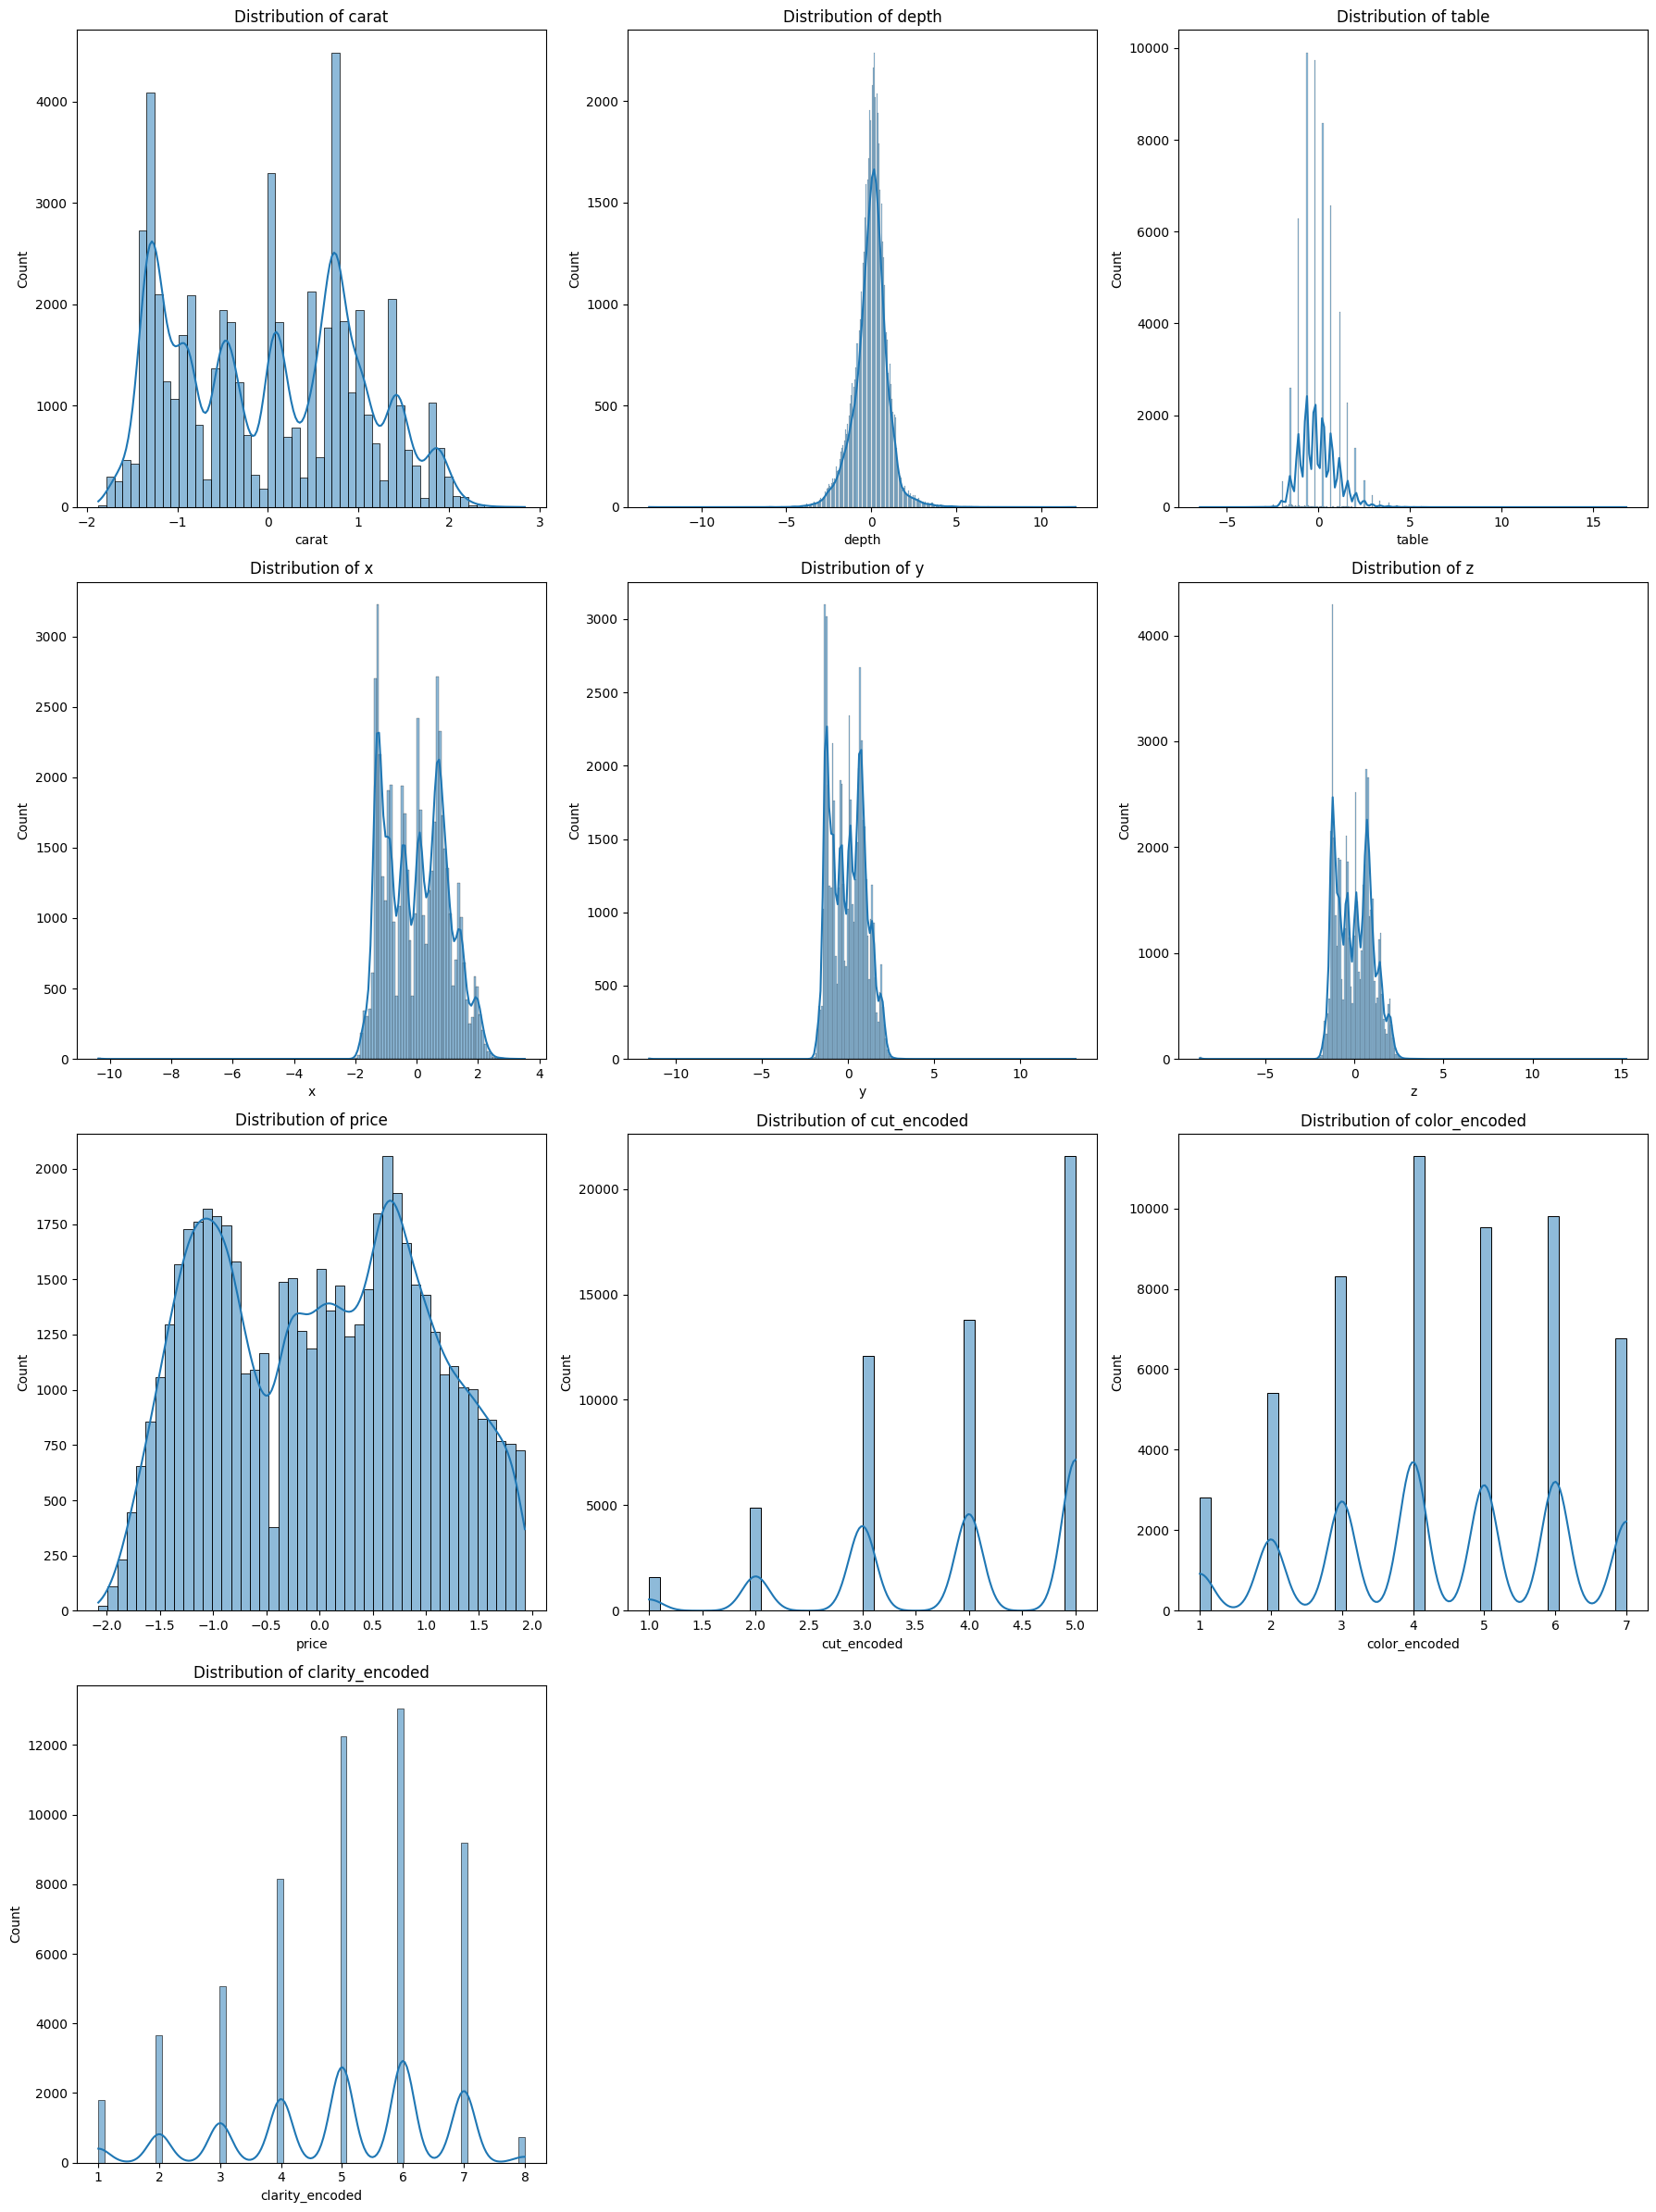

In [296]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # auto rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # flatten to index easily

# Plot each histogram with KDE
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()